
Sveučilište u Zagrebu
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Procjena parametara

*Verzija: 1.0
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **19. prosinca 2021. u 23:59h**

------------------------------

### Upute

Ova laboratorijska vježba sastoji se od tri zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import pandas as pd
import sklearn
from numpy import std
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pgmpy as pgm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Procjena maksimalne izglednosti

#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [2]:
def L(mu, N, m):
    return mu**m * (1-mu)**(N-m)

#### (b)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

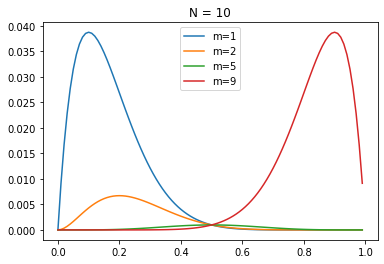

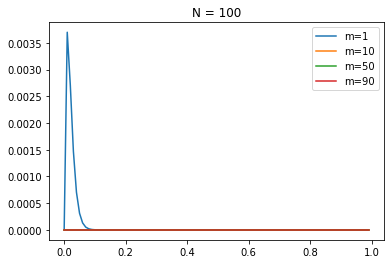

In [3]:
for m in [1,2,5,9]:
    plt.plot(np.arange(0,1,0.01),L(np.arange(0,1,0.01),10,m),label=f'm={m}')
    plt.title(f'N = 10')
    plt.legend()
plt.show()

for m in [1,10,50,90]:
    plt.plot(np.arange(0,1,0.01),L(np.arange(0,1,0.01),100,m),label=f'm={m}')
    plt.title(f'N = 100')
    plt.legend()
plt.show()

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

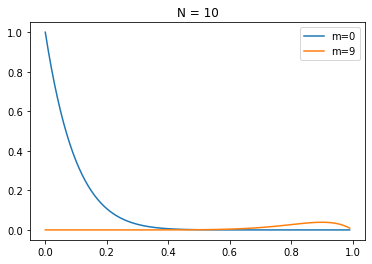

In [13]:
for m in [0,9]:
    plt.plot(np.arange(0,1,0.01),L(np.arange(0,1,0.01),10,m),label=f'm={m}')
    plt.title(f'N = 10')
    plt.legend()
plt.show()

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

### 2. Procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

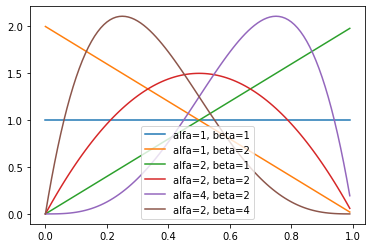

In [5]:
from scipy.stats import beta
# a,b=1
# quantile = np.arange (0.01, 1, 0.1)
# rv = beta(a, b)
# R = beta.pdf(quantile, a, b, loc = 0, scale = 1)
# distribution = np.linspace(0, np.maximum(rv.dist.b, 5))
# plot = plt.plot(distribution, rv.pdf(distribution))

x = np.arange(0,1,0.01)
plt.plot(x,beta.pdf(x, 1, 1), label=f'alfa=1, beta=1')
plt.plot(x,beta.pdf(x, 1, 2), label=f'alfa=1, beta=2')
plt.plot(x,beta.pdf(x, 2, 1), label=f'alfa=2, beta=1')
plt.plot(x,beta.pdf(x, 2, 2), label=f'alfa=2, beta=2')
plt.plot(x,beta.pdf(x, 4, 2), label=f'alfa=4, beta=2')
plt.plot(x,beta.pdf(x, 2, 4), label=f'alfa=2, beta=4')
plt.legend()

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

#### (b)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

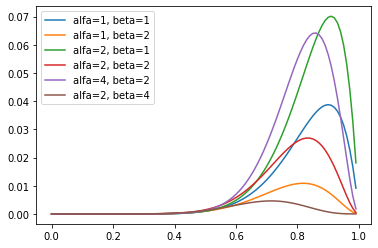

In [6]:
def aposteriori_vj(mu,N,m,a,b):
    return L(mu,N,m)*beta.pdf(mu,a,b)
x=np.arange(0,1,0.01)
plt.plot(x,aposteriori_vj(x,10,9, 1, 1), label=f'alfa=1, beta=1')
plt.plot(x,aposteriori_vj(x,10,9, 1, 2), label=f'alfa=1, beta=2')
plt.plot(x,aposteriori_vj(x,10,9, 2, 1), label=f'alfa=2, beta=1')
plt.plot(x,aposteriori_vj(x,10,9, 2, 2), label=f'alfa=2, beta=2')
plt.plot(x,aposteriori_vj(x,10,9, 4, 2), label=f'alfa=4, beta=2')
plt.plot(x,aposteriori_vj(x,10,9, 2, 4), label=f'alfa=2, beta=4')
plt.legend()

**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

#### (c)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

<function matplotlib.pyplot.show(close=None, block=None)>

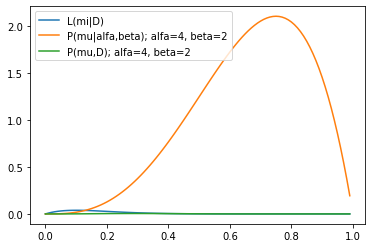

In [7]:
x=np.arange(0,1,0.01)

plt.plot(x,L(np.arange(0,1,0.01),10,1),label=f'L(mi|D)')
plt.plot(x,beta.pdf(x, 4, 2), label=f'P(mu|alfa,beta); alfa=4, beta=2')
plt.plot(x,aposteriori_vj(x,10,1,4, 2), label=f'P(mu,D); alfa=4, beta=2')
plt.legend()
plt.show

### 3. Analiza skupa podataka *Iris*

#### (a)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

Vrste iris cvijeta su: ['setosa', 'versicolor', 'virginica']
Atributi iris podatkovnog skupa su: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[('sepal length (cm)', 'sepal width (cm)'), ('sepal length (cm)', 'petal length (cm)'), ('sepal length (cm)', 'petal width (cm)'), ('sepal width (cm)', 'petal length (cm)'), ('sepal width (cm)', 'petal width (cm)'), ('petal length (cm)', 'petal width (cm)')]
sepal length (cm)
sepal width (cm)


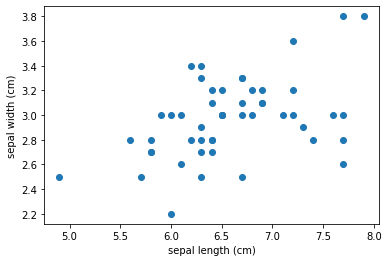

sepal length (cm)
petal length (cm)


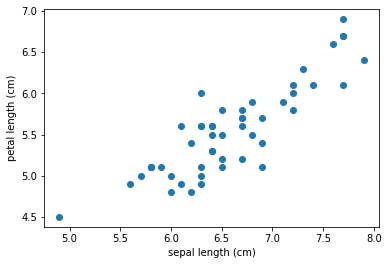

sepal length (cm)
petal width (cm)


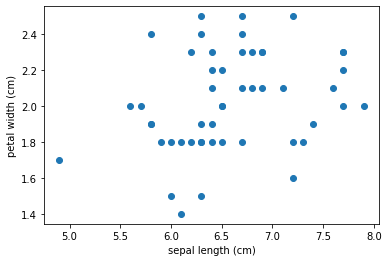

sepal width (cm)
petal length (cm)


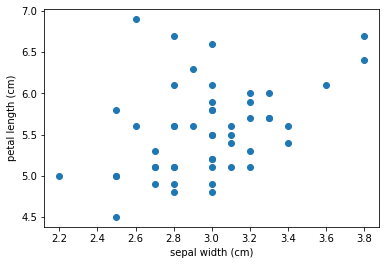

sepal width (cm)
petal width (cm)


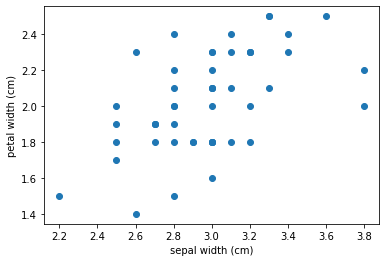

petal length (cm)
petal width (cm)


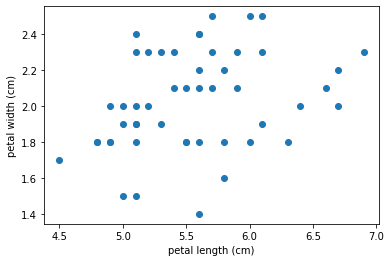

In [8]:
from sklearn.datasets import load_iris
import itertools as it

iris=load_iris()

print(f'Vrste iris cvijeta su: {list(iris.target_names)}')
print('Atributi iris podatkovnog skupa su:',iris['feature_names'])
print(iris['target'])

data=pd.DataFrame(iris.data,columns=iris['feature_names'])
data['species'] = iris.target

# Odlucujem se raditi s virginica klasom koja ima vrijednost 2

virginica=data[data['species']==2]

X_virginica=virginica.drop(columns=['species'])

comb=list(it.combinations(list(X_virginica.columns),2))
print(comb)

for c in comb:
    print(c[0])
    print(c[1])
    plt.scatter(X_virginica[c[0]],X_virginica[c[1]])
    plt.xlabel(c[0])
    plt.ylabel(c[1])
    plt.show()


#### (b)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [9]:
from scipy.stats import norm

def L_gauss(x, mi, sigma):
    product=1
    for xi in x:
        product*=norm(mi,pow(sigma,0.5)).pdf(xi)
    return np.log(product)

#### (c)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [10]:
for col in X_virginica.columns:
    mi=X_virginica[col].mean()
    sigma=std(X_virginica[col])**2

    print(f'ML-procjena za mi i sigma kvadrat za atribut "{col}":')
    print(f'Mi : {mi}')
    print(f'sigma : {sigma}')
    print(L_gauss(X_virginica[col],mi,sigma))
    print()

ML-procjena za mi i sigma kvadrat za atribut "sepal length (cm)":
Mi : 6.587999999999998
sigma : 0.3962560000000001
-47.80455636149741

ML-procjena za mi i sigma kvadrat za atribut "sepal width (cm)":
Mi : 2.974
sigma : 0.101924
-13.85873062371892

ML-procjena za mi i sigma kvadrat za atribut "petal length (cm)":
Mi : 5.5520000000000005
sigma : 0.29849600000000004
-40.721957995876785

ML-procjena za mi i sigma kvadrat za atribut "petal width (cm)":
Mi : 2.0260000000000002
sigma : 0.073924
-5.8289831462679444



#### (d)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [11]:
from scipy.stats import pearsonr

comb=list(it.combinations(list(X_virginica.columns),2))

for c in comb:
    print(f'Pearsonovog koeficijenta korelacije između "{c[0]}" i "{c[1]}"')
    print(pearsonr(X_virginica[c[0]],X_virginica[c[1]])[0])
    print()

Pearsonovog koeficijenta korelacije između "sepal length (cm)" i "sepal width (cm)"
0.45722781639411314

Pearsonovog koeficijenta korelacije između "sepal length (cm)" i "petal length (cm)"
0.8642247329355762

Pearsonovog koeficijenta korelacije između "sepal length (cm)" i "petal width (cm)"
0.2811077091573194

Pearsonovog koeficijenta korelacije između "sepal width (cm)" i "petal length (cm)"
0.40104457734278554

Pearsonovog koeficijenta korelacije između "sepal width (cm)" i "petal width (cm)"
0.5377280262661888

Pearsonovog koeficijenta korelacije između "petal length (cm)" i "petal width (cm)"
0.32210821590031835



#### (e)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [12]:
N=len(X_virginica)
#print("X_virginica.values[:20,:] =")
#print(X_virginica.values[:20,:])
#print()

print("Ako se gleda samo trokutasta matrica:")
print("--------------------------------------------------------------------------")
print()
for n in [N/4,N/2,N]:
    n=int(n)
    bias=np.cov(X_virginica.values[:n,:],bias=True,rowvar=False)
    unbias=np.cov(X_virginica.values[:n,:],bias=False,rowvar=False)
    bias_triu=np.triu(bias)
    unbias_triu=np.triu(unbias)

    difference=[]
    difference_pow=[]
    for i in range(4):
        for j in range(i,4):
            difference.append(abs(bias_triu[i][j]-unbias_triu[i][j]))
            difference_pow.append((bias_triu[i][j]-unbias_triu[i][j])**2)


    print(f'N = {n}')
    print(f'Srednja apsolutna razlika pristrane i nepristrane procjene: {np.mean(difference)}')
    print(f'Kvadratna razlika pristrane i nepristrane procjene: {np.mean(difference_pow)}')
    print()

print()
print("Razlika matrica:")
print("--------------------------------------------------------------------------")
print()
for n in [N/4,N/2,N]:
    n=int(n)
    bias=np.cov(X_virginica.values[:n,:],bias=True,rowvar=False)
    unbias=np.cov(X_virginica.values[:n,:],bias=False,rowvar=False)


    print(f'N = {n}')
    print(f'Srednja apsolutna razlika pristrane i nepristrane procjene: {np.mean(np.abs(bias-unbias))}')
    print(f'Kvadratna razlika pristrane i nepristrane procjene: {np.mean((bias-unbias)**2)}')
    print()

Ako se gleda samo trokutasta matrica:
--------------------------------------------------------------------------

N = 12
Srednja apsolutna razlika pristrane i nepristrane procjene: 0.015565656565656583
Kvadratna razlika pristrane i nepristrane procjene: 0.0004203752885547402

N = 25
Srednja apsolutna razlika pristrane i nepristrane procjene: 0.007918666666666647
Kvadratna razlika pristrane i nepristrane procjene: 0.00011103075831111048

N = 50
Srednja apsolutna razlika pristrane i nepristrane procjene: 0.0030046938775510025
Kvadratna razlika pristrane i nepristrane procjene: 1.5428303904706165e-05


Razlika matrica:
--------------------------------------------------------------------------

N = 12
Srednja apsolutna razlika pristrane i nepristrane procjene: 0.013972143308080824
Kvadratna razlika pristrane i nepristrane procjene: 0.0003439149450032212

N = 25
Srednja apsolutna razlika pristrane i nepristrane procjene: 0.007054833333333316
Kvadratna razlika pristrane i nepristrane procjen